- Author：kuhung （https://github.com/kuhung）
- Create time：2017/05/11
- Last modified：2017/05/18

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train = pd.read_csv('../dataset/pre/train.csv')
test = pd.read_csv('../dataset/pre/test.csv')

train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(4088017, 10)

In [6]:
train['clickTime'].max(),train['clickTime'].min()

(302359, 170000)

### 对感兴趣的特征进行观察

- 查看训练集日转化量

In [7]:
train['clickDate'] = train['clickTime'].apply(lambda x : x/10000)

train['clickHour'] = train['clickTime'].apply(lambda x : x/100%100)
# train['clickMinute'] = train['clickTime'].apply(lambda x : x%100)

data['clickDate'] = data['clickTime'].apply(lambda x : x/10000)
data['clickHour'] = data['clickTime'].apply(lambda x : x/100%100)

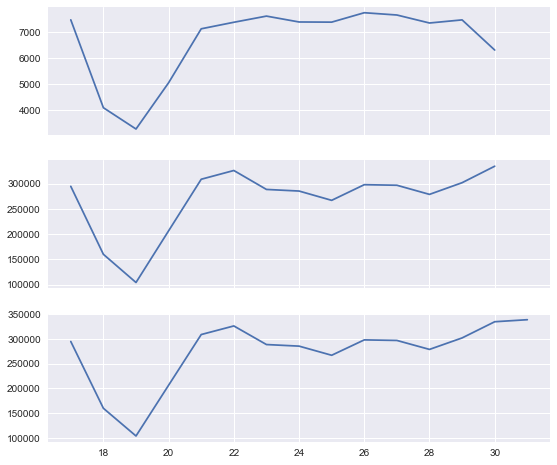

In [8]:
# creativeID或userID的统计效果相同，因为都有一个值，所以方便起见，取creativeID

f, axarr = plt.subplots(3, sharex=True, figsize = [9,8])
axarr[0].plot(train.groupby(['clickDate'])['label'].sum())   # 点击数
axarr[1].plot(train.groupby(['clickDate'])['creativeID'].count()) # 展示数
axarr[2].plot(data.groupby(['clickDate'])['creativeID'].count()) # 展示数


plt.show()

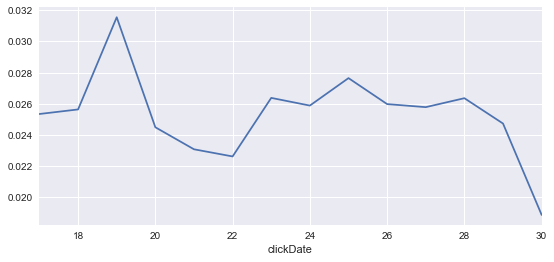

In [9]:
# 点击数/展示数
(train.groupby(['clickDate'])['label'].sum()/train.groupby(['clickDate'])['creativeID'].count()).plot(figsize = [9,4])

- 观察：
 1. 18\19\20的数据存在异常，使用时应慎重/ 后期注意排查
 2. 30号的数据出现滑坡，约有20%的有效转化为被统计。
 3. 点击转化率与点击数刚好相反，出乎意料。
 4. 数据中存在周期现象，21-22 28-29均存在下滑，19 26前后均存在小高峰。

- 结论


In [10]:
df = train.groupby(['clickDate','clickHour'])['label'].sum()
df.to_csv('../temp/Data_hour_transfor.csv')
df = pd.read_csv('../temp/Data_hour_transfor.csv',header=None)
df.columns = ['clickDate','clickHour','label_count']

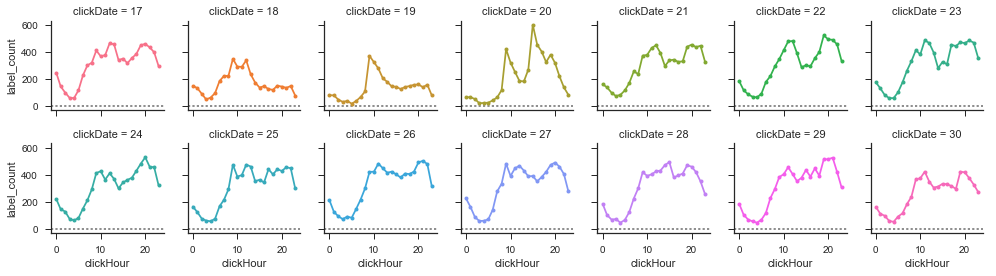

In [11]:
sns.set(style="ticks")

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="clickDate", hue="clickDate", col_wrap=7, size=2,aspect=1 )

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "clickHour", "label_count", marker="o", ms=4)


# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

In [36]:
df = data.groupby(['clickDate','clickHour'])['clickDate'].count()
df.to_csv('../temp/Data_hour_all.csv')
df = pd.read_csv('../temp/Data_hour_all.csv',header=None)
df.columns = ['clickDate','clickHour','count_all']

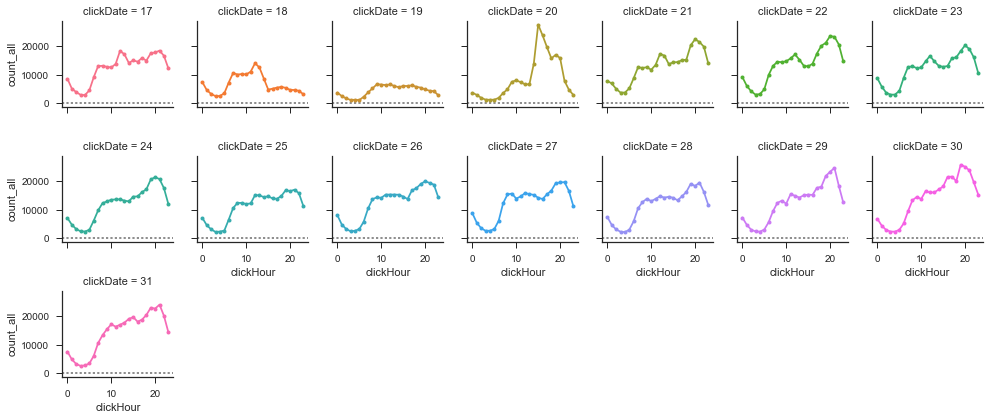

In [43]:
sns.set(style="ticks")

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="clickDate", hue="clickDate", col_wrap=7, size=2,aspect=1 )

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "clickHour", "count_all", marker="o", ms=4)


# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

In [44]:
df1 = pd.read_csv('../temp/Data_hour_transfor.csv',header=None)
df1.columns = ['clickDate','clickHour','label_count']
df2 = pd.read_csv('../temp/Data_hour_all.csv',header=None)
df2.columns = ['clickDate','clickHour','count_all']


df['label_count'] = df1['label_count']
df['rate'] = (df1['label_count'])/df2['count_all']

del df1,df2

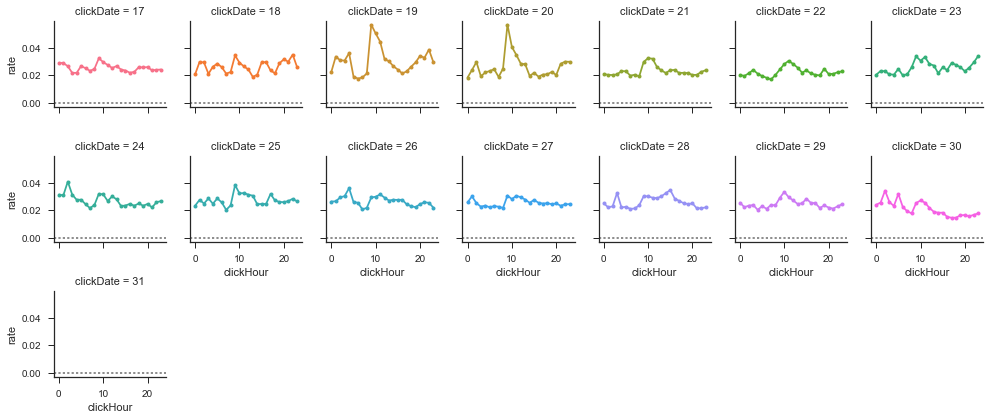

In [45]:
sns.set(style="ticks")

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="clickDate", hue="clickDate", col_wrap=7, size=2,aspect=1 )

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "clickHour", "rate", marker="o", ms=4)


# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

- 19-20号的转换率明显有一个突起，具体时间为上午10时
- 24号的数据可以作为测试集参考

### 查看总数据的用户数目以及广告数目


In [ ]:
data.shape[0]

In [ ]:
len(data['userID'].unique()),len(data['creativeID'].unique())

In [ ]:
len(train['userID'].unique()),len(train['creativeID'].unique()),len(test['userID'].unique()),len(test['creativeID'].unique())

In [ ]:
print '\n同一用户出现的平均次数:'
print float(data.shape[0])/len(data['userID'].unique())   

print '\n同一广告曝光的平均次数:'
print float(data.shape[0])/len(data['creativeID'].unique())

print '\n同一广告曝光在同一用户的平均次数:'
print float(len(data['userID'].unique()))   /len(data['creativeID'].unique())

print '\n训练集中同一广告曝光在同一用户的平均次数:'
print float(len(train['userID'].unique()))   /len(train['creativeID'].unique())

print '\n测试集中同一广告曝光在同一用户的平均次数:'
print float(len(test['userID'].unique()))   /len(test['creativeID'].unique())

- 结论：

  1、平均而言，每个用户出现了1.5次，较理想。
  
  2、训练集和测试集中的样本曝光次数不同，测试集明显稀疏于训练集。
  
  3、即：测试集的稀疏性带来的影响待观察

### 训练集和测试集的样本分布

- 用户属性

In [ ]:
print data['userID'].value_counts().head(10)
print '\n'

print train['userID'].value_counts().head(10)
print '\n'

print test['userID'].value_counts().head(10)
print '\n'

print data[data.label == 1]['userID'].value_counts().head(10)

- 观察：训练集和测试集的最高频次用户不重叠

- 结论：高频次用户需重点观察

In [ ]:
(data['userID'].value_counts()/15).head(1000).plot(use_index= False)

In [ ]:
import matplotlib.pyplot as plt

count = 1000
x1 = [x for x in range(count)]
y1 = train['userID'].value_counts().head(count).values/14 # 训练集14天，计算14天的平均值

x2 = [x for x in range(count)]
y2 = test['userID'].value_counts().head(count).values

f, axarr = plt.subplots(2, sharex=True, figsize = [9,8])
axarr[0].plot(x1, y1)
axarr[1].plot(x2, y2)

plt.show()

- 观察：

   1、训练集中，用户出现的总次数明显高于测试集，但平均而言，少于测试集用户出现的频率。

#### 训练集测试集转化分布

In [ ]:
data[data.label == 1]['userID'].value_counts().head(100).plot(use_index= False)

In [ ]:
data[data.label == 1]['userID'].value_counts().head(30)

In [ ]:
# 高转化率用户
data[(data.userID == 2676800)]

- 观察：

- 广告属性

In [ ]:
data[data.label == 1]['creativeID'].value_counts().head(20).plot(use_index= False)

In [ ]:
data['creativeID'].value_counts().head(20).plot(use_index= False)